# Classfication_logitRegression

分类任务有监督模型综合对比分析需要同学们自行搜集分类任务的数据集（一个即可），使用学过的逻辑回归、决策树、神经网络、支持向量机四个模型（可以使用Scikit-learn或其他工具包）在该数据集上进行对比评测，要求：

1.每个方法尝试不同参数，运用Accuracy, Precision, Recall, F1四个指标进行对比评测，把结果绘制成表格（四个模型四个表格）和可视化图（只可视化数值型参数即可，如SVM的C，决策树的深度等，每个模型每个参数一张图）

2.运用第1条尝试得到的最优参数对四个模型进行横向对比，计算Accuracy, Precision, Recall, F1四个指标，把结果绘制成表格

## 1. 导入必要的模块

In [1]:
# 导入必要的模块
import  pandas  as pd
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import  numpy  as np
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier

from sklearn import datasets
# 忽略警告
import warnings
warnings.filterwarnings("ignore")

## 2. my_confusion_matrix函数

In [2]:
def my_confusion_matrix(y_true, y_pred,algorithm):
    from sklearn.metrics import confusion_matrix
    labels = list(set(y_true))
    conf_mat = confusion_matrix(y_true, y_pred, labels=labels)
    print("[%s]confusion_matrix(left labels: y_true, up labels: y_pred):" % (algorithm))
    print(conf_mat)

## 3. my_classification_report函数

In [3]:
def my_classification_report(y_true, y_pred, algorithm):
    from sklearn.metrics import classification_report
    print("[%s]classification_report:" % (algorithm))
    print(classification_report(y_true, y_pred))

## 4. plot_confusion_matrix函数

绘制函数。

In [4]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## 5. 数据预处理

分类使用的是iris数据集，具体数据集的描述如下：

https://www.cnblogs.com/Belter/p/8831216.html

In [5]:
# 读取iris数据
iris  = datasets.load_iris()

# 随机划分训练测试集
feature = iris.data
label = iris.target
# 随机划分训练测试集
X_train,X_test, Y_train, Y_test = train_test_split(feature,label,test_size=0.3, random_state=0,stratify=label)


# 数据归一化
min_max_scaler = preprocessing.MinMaxScaler()
# 将数据进行归一化
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

## 6. 逻辑回归分类

使用逻辑回归分类

LogisticRegression训练集： 0.9523809523809523
LogisticRegression测试集： 0.9777777777777777
[LogisticRegression]classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[LogisticRegression]confusion_matrix(left labels: y_true, up labels: y_pred):
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Confusion matrix, without normalization
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


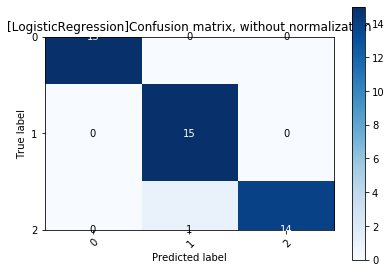

In [6]:
classifier = linear_model.LogisticRegression(C=1e5)
classifier.fit(X_train,Y_train)

Y_train_predict = classifier.predict(X_train)
Y_test_predict = classifier.predict(X_test)
Y_train_predict = Y_train_predict.astype('int32')
Y_test_predict = Y_test_predict.astype('int32')
Y_train = Y_train.astype('int32')
Y_test = Y_test.astype('int32')

# 计算KNN分类器的准确率
print("LogisticRegression训练集：",classifier.score(X_train,Y_train))
print("LogisticRegression测试集：",classifier.score(X_test,Y_test))
# 分类报告
my_classification_report(Y_test, Y_test_predict ,'LogisticRegression')
# 混淆矩阵
my_confusion_matrix(Y_test, Y_test_predict, 'LogisticRegression')
# 画混淆矩阵
np.set_printoptions(precision=2)
class_names = np.array(['0', '1', '2'])
# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, Y_test_predict, classes=class_names,
                      title='[LogisticRegression]Confusion matrix, without normalization')
# # Plot normalized confusion matrix
# plot_confusion_matrix(Y_test, Y_test_predict, classes=class_names, normalize=True,
#                       title='[LogisticRegression]Normalized confusion matrix')

print('=================================================================================================')



plt.show()